In [ ]:
# Install dependencies (if not preinstalled)
!pip install pandas scikit-learn matplotlib seaborn


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')[['v1', 'v2']]
df.columns = ['label', 'text']
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Lowercase the text
df['text'] = df['text'].str.lower()

# Remove punctuation
df['text'] = df['text'].str.translate(str.maketrans('', '', string.punctuation))

# Check the cleaned text
df.head()


,label,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer with English stop words removed
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data into TF-IDF features
X = vectorizer.fit_transform(df['text'])

# Labels: spam = 1, ham = 0
y = df['label'].map({'spam': 1, 'ham': 0})

print(f"Feature matrix shape: {X.shape}")
print(f"Number of spam messages: {y.sum()}")
print(f"Number of ham messages: {len(y) - y.sum()}")


Feature matrix shape: (5572, 9222)
Number of spam messages: 747
Number of ham messages: 4825


Accuracy: 0.967713004484305

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



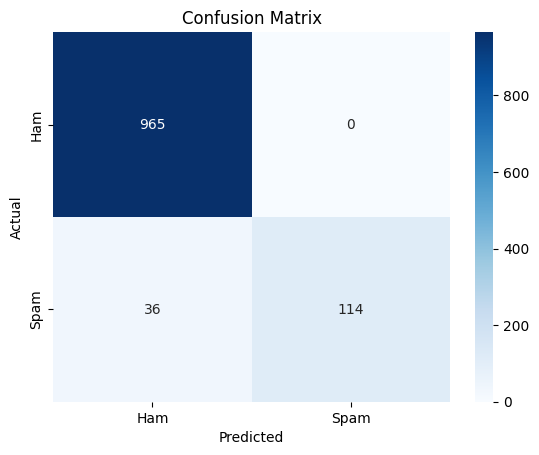

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9757847533632287

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.93      0.89      0.91       150

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



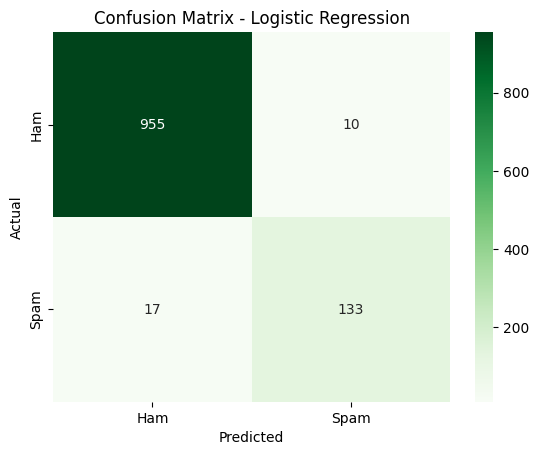

In [7]:
from sklearn.linear_model import LogisticRegression

# Vectorizer with unigrams and bigrams, and ignore very rare/common words
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=5, max_df=0.9)

# Refit the vectorizer to your text data
X = vectorizer.fit_transform(df['text'])

# Split data again (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression with balanced class weights
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
